In [1]:
# Import needed modules
import sympy as sp
import numpy as numpy
from sympy import init_printing
init_printing()

In [2]:
# Define the symbols
# Needed variables for LaPlace Transformation and the Frequency
s = sp.symbols('s', positive = True)
omega = sp.symbols('omega', positive = True, real = True)
# Needed for the plant
K, T, L = sp.symbols('K T L', positive = True, real = True)
# Needed for PI Controller
kp, ki, ti, b = sp.symbols('K_p K_i T_i b', real= True)
# Define a FOTD
def FOTD(x,y,z):
    return x/(y*s+1)*sp.exp(-z*s)
# Define a PI
def PI(x,y):
    return b*x + y/s

In [3]:
# Define the plant and the controller
G = FOTD(K,T,L).subs(L,0)
C = PI(kp,ki)
# Define the sensitivity function
S = 1/(1+G*C)
# Define the complementary sensitivity function
CS = sp.simplify(G*C/(1+G*C))
# Define the open Loop
O = sp.simplify(G*C)

Open Loop Transfer Function


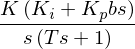

In [4]:
# Change to complex frequency
from sympy import I
CP_s = (O)
CP_s = sp.simplify(CP_s)
print('Open Loop Transfer Function') 
CP_s

Roots of the characteristic Polynomial


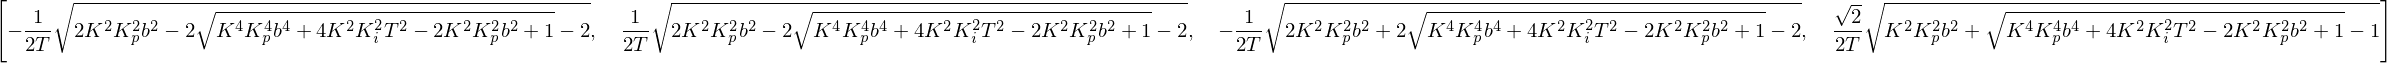

In [5]:
# The Absolute value of the 
CP_o = sp.Abs(CP_s.subs(s,I*omega))
# Get the roots 
Roots = sp.solve(sp.Eq(CP_o-1,0),omega)
for i in range(0,len(Roots)-1):
    Roots[i] = sp.simplify(Roots[i])
print('Roots of the characteristic Polynomial')
Roots

In [35]:
# Assume a Relationship between kP and kI
alpha = sp.symbols('alpha')
RL = sp.Eq(ki , alpha*omega)
CP_R = CP_o.subs(omega,ki/alpha)
ki_sol = sp.solve(sp.Eq(CP_R-1,0),ki)
# Get kp 
KP_EQ = sp.Eq(alpha**2*ki**2,K*kp*ki/T)
kp_sol = sp.solve(KP_EQ,kp)
print('Assume the following relationship')


Assume the following relationship


In [36]:
RL

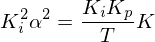

In [37]:
KP_EQ

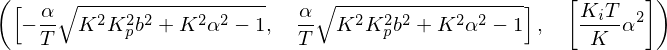

In [41]:
ki_sol, kp_sol

In [39]:
EQ1 = sp.Eq(ki_sol[0].subs(kp,kp_sol[0]),ki)
EQ2 = sp.Eq(ki_sol[1].subs(kp,kp_sol[0]),ki)

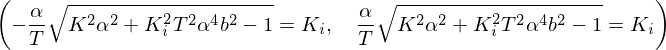

In [40]:
EQ1,EQ2

In [42]:
SOL1 = sp.solve(EQ1,ki)[0]
SOL2 = sp.solve(EQ2,ki)[0]

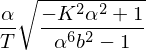

In [43]:
SOL1

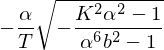

In [44]:
SOL2